In [2]:
pip install imagehash

     ---------------------------------------- 0.0/296.5 kB ? eta -:--:--
     -- ---------------------------------- 20.5/296.5 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 296.5/296.5 kB 4.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/4.3 MB ? eta -:--:--
   ----- ---------------------------------- 0.6/4.3 MB 17.8 MB/s eta 0:00:01
   ------- -------------------------------- 0.8/4.3 MB 9.6 MB/s eta 0:00:01
   ------- -------------------------------- 0.8/4.3 MB 9.6 MB/s eta 0:00:01
   ------- -------------------------------- 0.8/4.3 MB 4.7 MB/s eta 0:00:01
   ---------- ----------------------------- 1.1/4.3 MB 4.8 MB/s eta 0:00:01
   ------------ --------------------------- 1.3/4.3 MB 4.6 MB/s eta 0:00:01
   -------------- ------------------------- 1.5/4.3 MB 4.6 MB/s eta 0:00:01
   --------------- ------------------------ 1.7/4.3 MB 4.5 MB/s eta 0:00:01
   ---------------- ----------------------- 1.7/4.3 MB 4.4 MB/s eta 0:00:01
   ----------

In [17]:
pip install Pillow 


Note: you may need to restart the kernel to use updated packages.


In [44]:
from PIL import Image
import matplotlib.pyplot as plt
import imagehash
import os

In [45]:
def preview_image(image_path):
    try:
        image = Image.open(image_path)
        plt.imshow(image)
        plt.axis('off')  
        plt.show()
    except Exception as e:
        print(f"Error: {e}")


### There are a number of different image hashing functions for detecting duplicate or similar images, including average hashing (aHash), perceptual hashing (pHash), difference hashing (dHash), Haar wavelet hashing (wHash), and HSV color hashing.

In [47]:
def generate_hashes(image_path, hash_funcs):
    image = Image.open(image_path)
    hashes = [hash_func(image) for hash_func in hash_funcs]
    return hashes

def create_hashes_dataframe(dataset_path, hash_funcs):
    hashes_data = []

    for filename in os.listdir(dataset_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            current_image_path = os.path.join(dataset_path, filename)
            row = [filename] + generate_hashes(current_image_path, hash_funcs)
            hashes_data.append(row)

    columns = ['Image'] + [hash_func.__name__ for hash_func in hash_funcs]
    df = pd.DataFrame(hashes_data, columns=columns)
    return df

# Example usage:
dataset_path = r'C:\Users\abidm\Downloads\roof data\all\data'

# Choose the hashing techniques to compare
hash_funcs = [imagehash.average_hash, imagehash.dhash, imagehash.phash, imagehash.whash]

#we’ll create hash for each of the images in the dataset using the average hash, perceptual hash, difference hash, Haar wavelet hash algorithms. 
#We’ll store the results in a Pandas dataframe and print it out just to get any idea on how the hashes look like.
hashes_dataframe = create_hashes_dataframe(dataset_path, hash_funcs)
print(hashes_dataframe)

                                                Image      average_hash  \
0    a_10_jpg.rf.806f1d44415d26a0b5aa43c75adf141f.jpg  000303070f1f3f7e   
1    a_10_jpg.rf.bfa41ea2d9bb4d9743f94a493de442b2.jpg  000103070f1f3e7e   
2    a_10_jpg.rf.cb80d1e04378dd97008703034de3d0b8.jpg  000303070f1f3f7a   
3    a_11_jpg.rf.2882b5d1307c4d0a643efae7a5c9b9b0.jpg  7871f8fef4f07838   
4    a_11_jpg.rf.c698860e23adf4ab9d3e0546f7a961e7.jpg  7c717cdcf4f87830   
..                                                ...               ...   
250  t_50_jpg.rf.c55fd2297d85a23a022f09a1d499bbba.jpg  387c7cfcfc78285a   
251  t_50_jpg.rf.dd05eb6d16f9783087e48054b94f224b.jpg  387c7cfcf87c185a   
252  t_50_jpg.rf.e6e55dcb9e055c5b661b987833afad83.jpg  3c7c7cfcfc7c1a5a   
253   t_6_jpg.rf.c331d5986b38999c532bacb5090aa2d9.jpg  f8f8f8f8d1908001   
254  t_7_jpeg.rf.4ddeb5a7bf625cc33866aeff250f5a3f.jpg  dbfb333028080000   

                dhash             phash             whash  
0    0073161e9a3262d6  956a455a726e706b

### i)Average Hashing

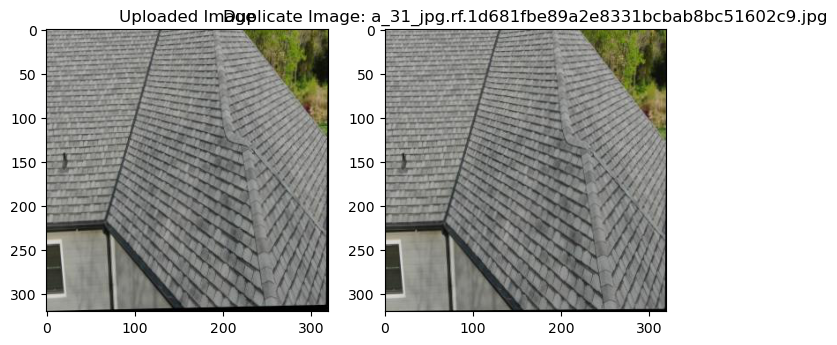

In [55]:
from PIL import Image
import imagehash
import os
import matplotlib.pyplot as plt

def hash_similarity(hash1, hash2, threshold=10):
    return hash1 - hash2 < threshold

def preview_images(main_image_path, dataset_path, hash_func, threshold=10):
    main_image = Image.open(main_image_path)
    main_hash = hash_func(main_image)

    # Display the uploaded image
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(main_image)
    plt.title('Uploaded Image')

    duplicate_found = False

    # Iterate through the images in the dataset
    for filename in os.listdir(dataset_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            current_image_path = os.path.join(dataset_path, filename)
            current_image = Image.open(current_image_path)
            current_hash = hash_func(current_image)

            # Check for duplicates
            if hash_similarity(main_hash, current_hash, threshold):
                duplicate_found = True

                # Display the duplicate image
                plt.subplot(1, 2, 2)
                plt.imshow(current_image)
                plt.title(f'Duplicate Image: {filename}')

                plt.show()

                break  # Exit the loop when a duplicate is found

    if not duplicate_found:
        plt.show()
        print("The uploaded image is not a duplicate.")

# Example usage for Dhash:
uploaded_image_path1 = r'C:\Users\abidm\Downloads\roof data\all\upload\duplicate3.jpg'
dataset_path1 = r'C:\Users\abidm\Downloads\roof data\all\data'
threshold = 10

preview_images(uploaded_image_path1, dataset_path1, imagehash.dhash, threshold)




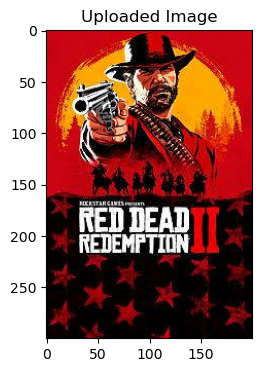

The uploaded image is not a duplicate.


In [56]:
def preview_images(main_image_path, dataset_path, threshold=10):
    main_image = Image.open(main_image_path)
    main_hash = imagehash.average_hash(main_image)

    # Display the uploaded image
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(main_image)
    plt.title('Uploaded Image')

    duplicate_found = False

    # Iterate through the images in the dataset
    for filename in os.listdir(dataset_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            current_image_path = os.path.join(dataset_path, filename)
            current_image = Image.open(current_image_path)
            current_hash = imagehash.average_hash(current_image)

            # Check for duplicates
            if main_hash - current_hash < threshold:
                duplicate_found = True

                # Display the duplicate image
                plt.subplot(1, 2, 2)
                plt.imshow(current_image)
                plt.title(f'Duplicate Image: {filename}')

                plt.show()

                break  

    if not duplicate_found:
        plt.show()
        print("The uploaded image is not a duplicate.")

# Example usage:
uploaded_image_path = r'C:\Users\abidm\Downloads\roof data\all\upload\rdr2.jpeg'
dataset_path = r'C:\Users\abidm\Downloads\roof data\all\data'
threshold = 10

preview_images(uploaded_image_path, dataset_path, threshold)


### ii) d-hashing

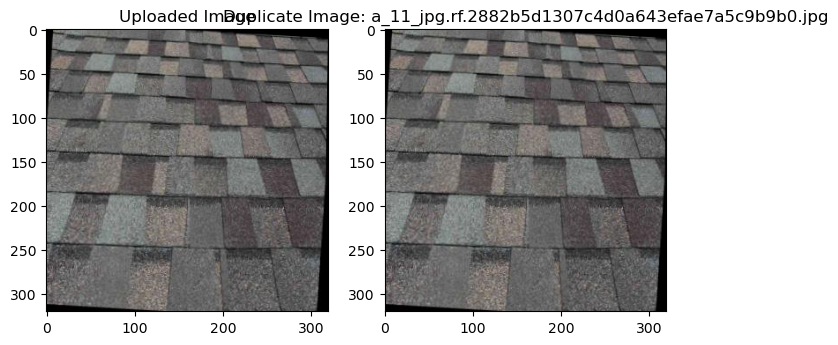

In [62]:
from PIL import Image
import imagehash
import os
import matplotlib.pyplot as plt

def hash_similarity(hash1, hash2, threshold=10):
    return hash1 - hash2 < threshold

def preview_images(main_image_path, dataset_path, hash_func, threshold=10):
    main_image = Image.open(main_image_path)
    main_hash = hash_func(main_image)

    # Display the uploaded image
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(main_image)
    plt.title('Uploaded Image')

    duplicate_found = False

    # Iterate through the images in the dataset
    for filename in os.listdir(dataset_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            current_image_path = os.path.join(dataset_path, filename)
            current_image = Image.open(current_image_path)
            current_hash = hash_func(current_image)

            # Check for duplicates
            if hash_similarity(main_hash, current_hash, threshold):
                duplicate_found = True

                # Display the duplicate image
                plt.subplot(1, 2, 2)
                plt.imshow(current_image)
                plt.title(f'Duplicate Image: {filename}')

                plt.show()

                break  # Exit the loop when a duplicate is found

    if not duplicate_found:
        plt.show()
        print("The uploaded image is not a duplicate.")

# Example usage for Dhash:
uploaded_image_path = r'C:\Users\abidm\Downloads\roof data\all\upload\duplicate2.jpg'
dataset_path = r'C:\Users\abidm\Downloads\roof data\all\data'
threshold = 10

preview_images(uploaded_image_path, dataset_path, imagehash.dhash, threshold)




### iii) p-hash

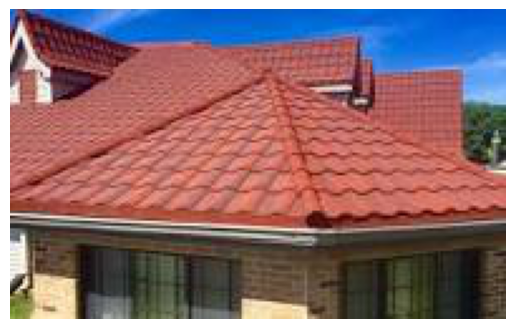

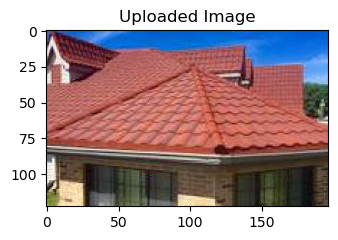

The uploaded image is not a duplicate.


In [63]:
# Example usage for Phash:
uploaded_image_path = r'C:\Users\abidm\Downloads\roof data\all\upload\images.jpeg'
preview_image(uploaded_image_path)
preview_images(uploaded_image_path, dataset_path, imagehash.phash, threshold)



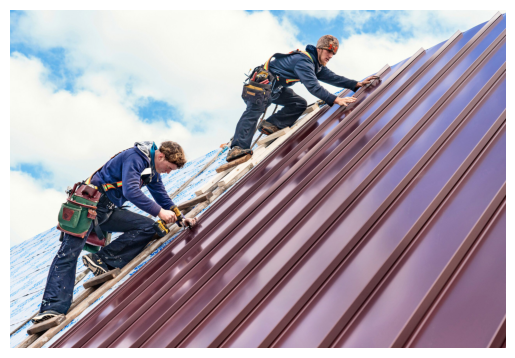

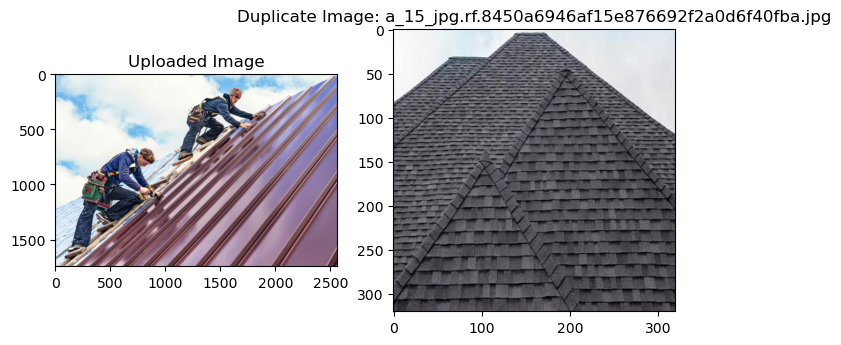

In [64]:
# Example usage for Whash giving fasle positive
uploaded_image_path = r'C:\Users\abidm\Downloads\roof data\all\upload\metalroofs.jpg'
preview_image(uploaded_image_path)
preview_images(uploaded_image_path, dataset_path, imagehash.whash, threshold) 